In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime 
import matplotlib as mpl
import matplotlib.ticker as mticker
import math
from scipy.optimize import curve_fit
from matplotlib import cm
from scipy import stats


#first importing the data using pandas 
sc_compact = 'sc_compact_1995_2019_d.csv'
dataframe = pd.read_csv(sc_compact)

omni_file = 'omni_min_2012.csv'
dataframe_omni = pd.read_csv(omni_file)


#dataframe had no datetime column so I created one
dataframe['datetime'] = dataframe.year.astype(str).str.cat(dataframe.month.astype(str),sep='-').str.cat(dataframe.day.astype(str), sep='-').str.cat(dataframe.hour.astype(str),sep=',').str.cat(dataframe.minute.astype(str),sep=':')

dataframe12 = dataframe[dataframe.datetime.between('2012', '2013')]

#seperate dataframes for the events 
january22 = dataframe_omni[dataframe_omni.datetime.between('2012-01-22 05:10:00', '2012-01-22 07:12:00')]
january24 = dataframe_omni[dataframe_omni.datetime.between('2012-01-24 14:02:00', '2012-01-24 16:04:00')]
Febuary26 = dataframe_omni[dataframe_omni.datetime.between('2012-02-26 20:38:00', '2012-02-26 22:40:00')]
#march7 = dataframe_omni[dataframe_omni.datetime.between('2012-03-07 03:18:00', '2012-03-07 05:20:00')]
#march8 = dataframe_omni[dataframe_omni.datetime.between('2012-03-08 10:2:00', '2012-03-8 12:4:00')]
march12 = dataframe_omni[dataframe_omni.datetime.between('2012-03-12 08:14:00', '2012-03-12 10:16:00')]
march15 = dataframe_omni[dataframe_omni.datetime.between('2012-03-15 12:05:00', '2012-03-15 14:07:00')]
april23 = dataframe_omni[dataframe_omni.datetime.between('2012-04-23 02:19:00', '2012-04-23 04:21:00')]
may21 = dataframe_omni[dataframe_omni.datetime.between('2012-05-21 18:35:00', '2012-05-21 20:37:00')]
#june161 = dataframe_omni[dataframe_omni.datetime.between('2012-06-16 08:54:00 ', '2012-06-16 10:56:00')]
#june162 = dataframe_omni[dataframe_omni.datetime.between('2012-06-16 19:18:00 ', '2012-06-16 21:20:00')]
june163 = dataframe_omni[dataframe_omni.datetime.between('2012-06-16 20:14:00 ', '2012-06-16 22:17:00')]
july14 = dataframe_omni[dataframe_omni.datetime.between('2012-07-14 17:09:00 ', '2012-07-14 19:12:00')]
july20 =  dataframe_omni[dataframe_omni.datetime.between('2012-07-20 03:46:00', '2012-07-20 05:48:00')]
july21= dataframe_omni[dataframe_omni.datetime.between('2012-07-21 15:03:00 ', '2012-07-21 17:06:00')]
#september3= dataframe_omni[dataframe_omni.datetime.between('2012-09-03 11:12:00 ', '2012-09-03 13:14:00')]
september301 = dataframe_omni[dataframe_omni.datetime.between('2012-09-30 10:30:00', '2012-09-30 12:32:00')]
september302 = dataframe_omni[dataframe_omni.datetime.between('2012-09-30 22:04:00', '2012-10-01 00:06:00')]
october31 =  dataframe_omni[dataframe_omni.datetime.between('2012-10-31 14:39:00', '2012-10-31 16:41:00')]
november12 = dataframe_omni[dataframe_omni.datetime.between('2012-11-12 22:10:00', '2012-11-13 00:12:00')]
november23 = dataframe_omni[dataframe_omni.datetime.between('2012-11-23 20:49:00', '2012-11-23 22:51:00')]

#january22 = [item for item in january22 if item != 'nan']

january24 
Febuary26
march12 

,year,doy,hour,minute,imf_sc_id,plasma_sc_id,n_imf,n_plasma,pc_intercept,timeshift,...,asyd,asyh,pc_n,msphere_machn,month,day,unix,datetime,clock_angle,b_total
102734,2012,72,8,14,71,71,4.0,2.0,75.0,3362.0,...,15,9,2.41,5.1,3.0,12.0,1.331540e+09,2012-03-12 08:14:00,111.245950,7.269622
102735,2012,72,8,15,71,71,3.0,3.0,100.0,3677.0,...,15,10,2.39,5.1,3.0,12.0,1.331540e+09,2012-03-12 08:15:00,114.873429,7.010264
102736,2012,72,8,16,71,71,3.0,1.0,100.0,3740.0,...,15,11,2.38,4.8,3.0,12.0,1.331540e+09,2012-03-12 08:16:00,125.790493,7.570112
102737,2012,72,8,17,71,99,3.0,NaN,100.0,3631.0,...,15,11,2.38,NaN,3.0,12.0,1.331540e+09,2012-03-12 08:17:00,113.013318,7.260138
102738,2012,72,8,18,71,99,3.0,NaN,100.0,3450.0,...,16,11,2.40,NaN,3.0,12.0,1.331540e+09,2012-03-12 08:18:00,115.075148,7.312845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102852,2012,72,10,12,71,71,4.0,2.0,0.0,1950.0,...,39,57,7.67,4.6,3.0,12.0,1.331547e+09,2012-03-12 10:12:00,3.994693,24.084341
102853,2012,72,10,13,71,71,3.0,2.0,0.0,1972.0,...,37,51,8.21,4.4,3.0,12.0,1.331547e+09,2012-03-12 10:13:00,3.387075,25.201498
102854,2012,72,10,14,71,71,5.0,1.0,0.0,2102.0,...,36,45,8.49,4.6,3.0,12.0,1.331547e+09,2012-03-12 10:14:00,3.245396,23.075062
102855,2012,72,10,15,71,71,4.0,1.0,0.0,2008.0,...,34,41,8.24,4.7,3.0,12.0,1.331547e+09,2012-03-12 10:15:00,4.700283,23.591295


In [3]:
symhlist = []
epochlist = [] 
bylist = []
bzlist = []
pressurelist = []
speedlist = []
densitylist = []
aelist = []
aulist = []
allist = []
pcnlist = []

             
for df in (january22, january24, Febuary26, march12, march15, april23, may21, june163, july14, july20, july21,september301, september302, october31, november12, november23): 
    symh = df['symh'].tolist()
    symhlist.append(symh)
    

for df in (january22, january24, Febuary26, march12, march15, april23, may21, june163, july14, july20, july21,september301, september302, october31, november12, november23): 
    by = df['by_gse'].tolist()
    bylist.append(by)
    

for df in (january22, january24, Febuary26, march12, march15, april23, may21, june163, july14, july20, july21,september301, september302, october31, november12, november23): 
    bz = df['bz_gse'].tolist()
    bzlist.append(bz)
    

for df in (january22, january24, Febuary26, march12, march15, april23, may21, june163, july14, july20, july21,september301, september302, october31, november12, november23): 
    pressure = df['flow_pressure'].tolist()
    pressurelist.append(pressure)
    

for df in (january22, january24, Febuary26, march12, march15, april23, may21, june163, july14, july20, july21,september301, september302, october31, november12, november23): 
    speed = df['flow_speed'].tolist()
    speedlist.append(speed)


for df in (january22, january24, Febuary26, march12, march15, april23, may21, june163, july14, july20, july21,september301, september302, october31, november12, november23): 
    density = df['proton_density'].tolist()
    densitylist.append(density)
    

for df in (january22, january24, Febuary26, march12, march15, april23, may21, june163, july14, july20, july21,september301, september302, october31, november12, november23): 
    ae = df['ae'].tolist()
    aelist.append(ae)
    

for df in (january22, january24, Febuary26, march12, march15, april23, may21, june163, july14, july20, july21,september301, september302, october31, november12, november23): 
    au = df['au'].tolist()
    aulist.append(au)
    

for df in (january22, january24, Febuary26, march12, march15, april23, may21, june163, july14, july20, july21,september301, september302, october31, november12, november23): 
    al = df['al'].tolist()
    allist.append(al)
    

for df in (january22, january24, Febuary26, march12, march15, april23, may21, june163, july14, july20, july21,september301, september302, october31, november12, november23): 
    pcn = df['pc_n'].tolist()
    pcnlist.append(pcn)
    
 



Text(0.5, 1.0, 'Superposed Epoch for SC$^2$ Events 2012')

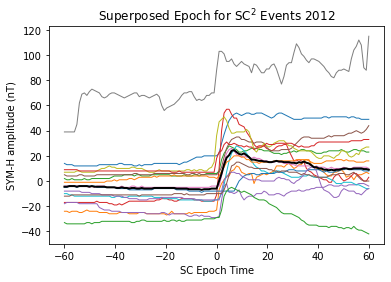

In [4]:
#plotting just SYM-H 

n_events = 16
n_time_steps = 123

x=np.linspace(-60,60,123)
y=np.full([n_events,n_time_steps],symhlist)

# Plot individual traces
fig,ax=plt.subplots()
for i in range(n_events):
    ax.plot(x,y[i,:], linewidth=1.0)
    
# Calculate the superposed epoch (SPE) trace
spe_trace=np.full(n_time_steps,np.zeros)
for i in range(n_time_steps):
    spe_trace[i]=np.median(y[:,i])


# Plot the SPE trace
ax.plot(x,spe_trace, color='black', linewidth=2.0)

ax.set_xlabel('SC Epoch Time')
ax.set_ylabel('SYM-H amplitude (nT)')
ax.set_title('Superposed Epoch for SC$^2$ Events 2012')


[-4.5 -4.5 -4.  -4.  -4.  -4.5 -4.  -4.  -4.  -4.  -4.5 -4.  -4.5 -4.5
 -4.5 -4.5 -4.5 -5.  -5.  -5.  -5.  -5.5 -5.5 -5.  -5.5 -5.5 -6.  -5.5
 -5.5 -6.  -6.  -5.5 -6.  -6.  -6.  -6.  -5.5 -5.5 -5.5 -5.5 -5.5 -5.5
 -5.5 -5.5 -5.5 -6.  -6.  -6.  -6.  -6.  -6.5 -6.5 -6.5 -6.5 -6.5 -7.
 -6.5 -6.5 -6.5 -6.  -6.  -6.   0.   6.  13.  18.5 20.5 24.  24.5 23.
 21.5 21.  22.  20.5 19.  17.  17.  16.5 16.  16.  15.5 15.5 15.  15.
 15.5 16.  15.5 15.5 15.  15.  15.  14.5 14.5 14.  15.  14.5 15.5 14.5
 14.  12.5 11.  11.  10.  10.   9.   9.   8.5  9.   8.5  9.   9.   9.5
 10.  10.   9.5  9.5 10.  10.  10.  10.   9.5  9.5  9. ]
11.5


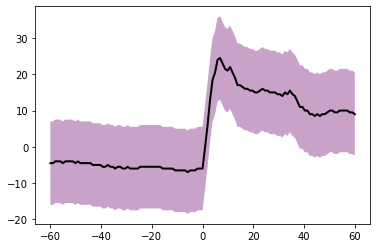

In [5]:
n_events = 16
n_time_steps = 123

x=np.linspace(-60,60,123)
y=np.full([n_events,n_time_steps],symhlist)


# Calculate the superposed epoch (SPE) trace
spe_trace=np.full(n_time_steps,np.zeros)
for i in range(n_time_steps):
    spe_trace[i]=np.nanmedian(y[:,i])
spe_trace = spe_trace.astype(np.float64)

fig,ax=plt.subplots()
ax.plot(x,spe_trace, color='black', linewidth=2.0)
print(spe_trace)
median_absolute_deviation = np.median([abs(x-spe_trace) for x in symhlist])
print(median_absolute_deviation)

plt.fill_between(x,spe_trace+median_absolute_deviation, spe_trace-median_absolute_deviation, facecolor='#C8A2C8', zorder=0)

Text(105.125, 0.5, 'PC(N)\n(DTU)')

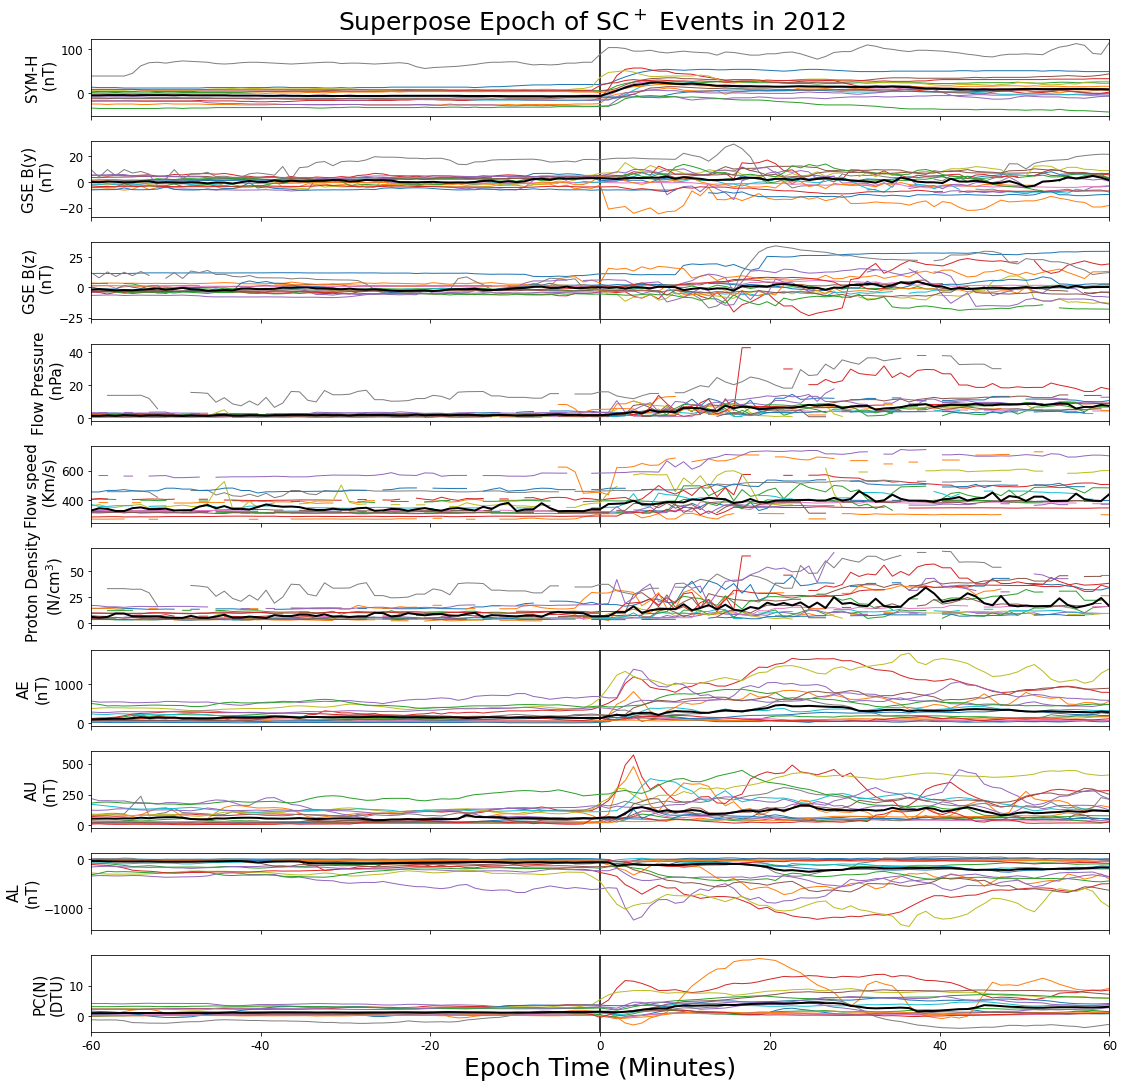

In [30]:
n_events = 16
n_time_steps = 123

x=np.linspace(-60,60,123)
y1=np.full([n_events,n_time_steps],symhlist)
y2 = np.full([n_events,n_time_steps],bylist)
y3 = np.full([n_events,n_time_steps],bzlist)
y4 = np.full([n_events,n_time_steps],pressurelist)
y5 = np.full([n_events,n_time_steps],speedlist)
y6 = np.full([n_events,n_time_steps],densitylist)
y7 = np.full([n_events,n_time_steps],aelist)
y8 = np.full([n_events,n_time_steps],aulist)
y9 = np.full([n_events,n_time_steps],allist)
y10 = np.full([n_events,n_time_steps],pcnlist)


#Plotting full summary 
fig, (ax1, ax2, ax3, ax4, ax5, ax6,ax7,ax8,ax9,ax10) = plt.subplots(10,sharex=True)

plt.rc('font', size=12)
plt.rc('axes', titlesize=12)
fig.set_figheight(15)
fig.set_figwidth(15)

#setting it to remove issue with whitespace between title and figure and at margins 
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.rcParams['axes.xmargin'] = 0

fig.suptitle('Superpose Epoch of SC$^+$ Events in 2012', fontsize = 25)
plt.xlabel('Epoch Time (Minutes)', fontsize = 25)
xticks = (-60,-40,-20,0,20,40,60)
plt.xticks(xticks,[-60,-40,-20,0,20,40,60])
ax1.axvline(x = '0', color = 'k', label = 'axvline - full height')
ax2.axvline(x = '0', color = 'k', label = 'axvline - full height')
ax3.axvline(x = '0', color = 'k', label = 'axvline - full height')
ax4.axvline(x = '0', color = 'k', label = 'axvline - full height')
ax5.axvline(x = '0', color = 'k', label = 'axvline - full height')
ax6.axvline(x = '0', color = 'k', label = 'axvline - full height')
ax7.axvline(x = '0', color = 'k', label = 'axvline - full height')
ax8.axvline(x = '0', color = 'k', label = 'axvline - full height')
ax9.axvline(x = '0', color = 'k', label = 'axvline - full height')
ax10.axvline(x = '0', color = 'k', label = 'axvline - full height')

for i in range(n_events):
    ax1.plot(x,y1[i,:], linewidth=1.0)
    
spe_trace1=np.full(n_time_steps,np.zeros)
for i in range(n_time_steps):
    spe_trace1[i]=np.nanmedian(y1[:,i])

ax1.plot(x,spe_trace1, color='black', linewidth=2.0)
ax1.set_ylabel(r'SYM-H''\n'r' (nT)',fontsize=15)


for i in range(n_events):
    ax2.plot(x,y2[i,:], linewidth=1.0)
    
spe_trace2=np.full(n_time_steps,np.zeros)
for i in range(n_time_steps):
    spe_trace2[i]=np.nanmedian(y2[:,i])

ax2.plot(x,spe_trace2, color='black', linewidth=2.0)
ax2.set_ylabel(r'GSE B(y)''\n'r' (nT)',fontsize=15)  

for i in range(n_events):
    ax3.plot(x,y3[i,:], linewidth=1.0)
    
spe_trace3=np.full(n_time_steps,np.zeros)
for i in range(n_time_steps):
    spe_trace3[i]=np.nanmedian(y3[:,i])

ax3.plot(x,spe_trace3, color='black', linewidth=2.0)
ax3.set_ylabel(r'GSE B(z)''\n'r' (nT)',fontsize=15)  
   
for i in range(n_events):
    ax4.plot(x,y4[i,:], linewidth=1.0)
    
spe_trace4=np.full(n_time_steps,np.nan)
for i in range(n_time_steps):
    spe_trace4[i]=np.nanmedian(y4[:,i])

ax4.plot(x,spe_trace4, color='black', linewidth=2.0)
ax4.set_ylabel(r'Flow Pressure''\n'r' (nPa)',fontsize=15)  

for i in range(n_events):
    ax5.plot(x,y5[i,:], linewidth=1.0)
    
spe_trace5=np.full(n_time_steps,np.zeros)
for i in range(n_time_steps):
    spe_trace5[i]=np.nanmedian(y5[:,i])

ax5.plot(x,spe_trace5, color='black', linewidth=2.0)
ax5.set_ylabel(r'Flow speed''\n'r' (Km/s)',fontsize=15)
for i in range(n_events):
    ax6.plot(x,y6[i,:], linewidth=1.0)

spe_trace6=np.full(n_time_steps,np.zeros)
for i in range(n_time_steps):
    spe_trace6[i]=np.nanmedian(y6[:,i])

ax6.plot(x,spe_trace6, color='black', linewidth=2.0)
ax6.set_ylabel(r'Proton Density''\n'r'(N/cm$^3$)',fontsize=15)
for i in range(n_events):
    ax7.plot(x,y7[i,:], linewidth=1.0)

spe_trace7=np.full(n_time_steps,np.zeros)
for i in range(n_time_steps):
    spe_trace7[i]=np.nanmedian(y7[:,i])

ax7.plot(x,spe_trace7, color='black', linewidth=2.0)
ax7.set_ylabel(r'AE''\n' r'(nT)',fontsize=15)


for i in range(n_events):
    ax8.plot(x,y8[i,:], linewidth=1.0)

spe_trace8=np.full(n_time_steps,np.zeros)
for i in range(n_time_steps):
    spe_trace8[i]=np.nanmedian(y8[:,i])

ax8.plot(x,spe_trace8, color='black', linewidth=2.0)
ax8.set_ylabel(r'AU''\n' r'(nT)',fontsize=15)
for i in range(n_events):
    ax9.plot(x,y9[i,:], linewidth=1.0)

spe_trace9=np.full(n_time_steps,np.zeros)
for i in range(n_time_steps):
    spe_trace9[i]=np.nanmedian(y9[:,i])

ax9.plot(x,spe_trace9, color='black', linewidth=2.0)
ax9.set_ylabel(r'AL''\n' r'(nT)',fontsize=15)

for i in range(n_events):
    ax10.plot(x,y10[i,:],linewidth = 1.0)
    
spe_trace10=np.full(n_time_steps,np.zeros)
for i in range(n_time_steps):
    spe_trace10[i]=np.nanmedian(y10[:,i])

ax10.plot(x,spe_trace10, color='black', linewidth=2.0)
ax10.set_ylabel(r'PC(N)''\n''(DTU)',fontsize=15)



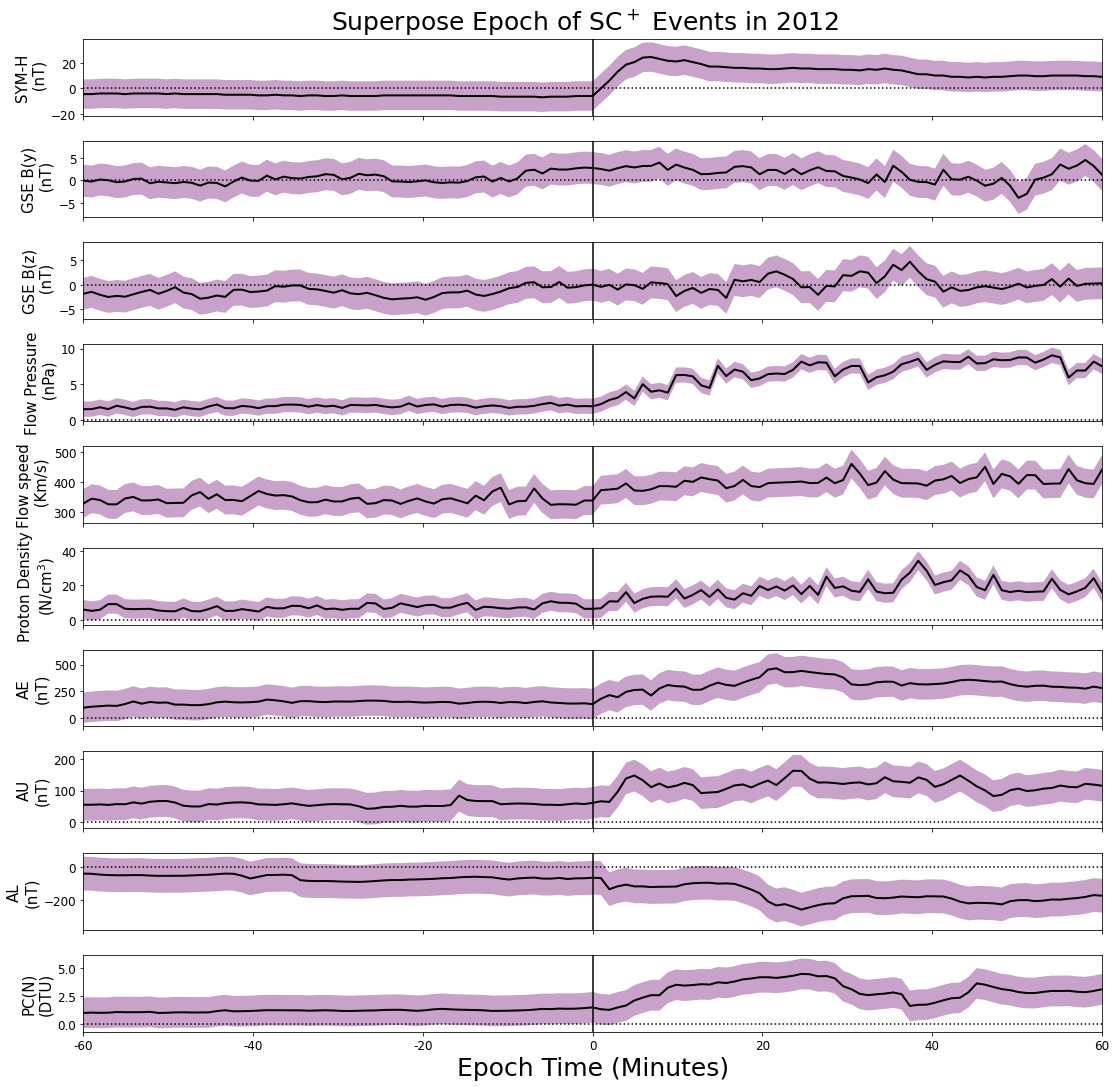

In [29]:
n_events = 16
n_time_steps = 123

x=np.linspace(-60,60,123)
y1=np.full([n_events,n_time_steps],symhlist)
y2 = np.full([n_events,n_time_steps],bylist)
y3 = np.full([n_events,n_time_steps],bzlist)
y4 = np.full([n_events,n_time_steps],pressurelist)
y5 = np.full([n_events,n_time_steps],speedlist)
y6 = np.full([n_events,n_time_steps],densitylist)
y7 = np.full([n_events,n_time_steps],aelist)
y8 = np.full([n_events,n_time_steps],aulist)
y9 = np.full([n_events,n_time_steps],allist)
y10 = np.full([n_events,n_time_steps],pcnlist)


#Plotting full summary 
fig, (ax1, ax2, ax3, ax4, ax5, ax6,ax7,ax8,ax9,ax10) = plt.subplots(10,sharex=True)

#setting font sizes, heights and widths of each panel so the graph is clear
plt.rc('font', size=12)
plt.rc('axes', titlesize=12)
fig.set_figheight(15)
fig.set_figwidth(15)

#setting it to remove issue with whitespace between title and figure and at margins 
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.rcParams['axes.xmargin'] = 0

fig.suptitle('Superpose Epoch of SC$^+$ Events in 2012', fontsize = 25)
plt.xlabel('Epoch Time (Minutes)', fontsize = 25)
xticks = (-60,-40,-20,0,20,40,60)
plt.xticks(xticks,[-60,-40,-20,0,20,40,60])
ax1.axvline(x = '0', color = 'k', label = 'axvline - full height')
ax2.axvline(x = '0', color = 'k', label = 'axvline - full height')
ax3.axvline(x = '0', color = 'k', label = 'axvline - full height')
ax4.axvline(x = '0', color = 'k', label = 'axvline - full height')
ax5.axvline(x = '0', color = 'k', label = 'axvline - full height')
ax6.axvline(x = '0', color = 'k', label = 'axvline - full height')
ax7.axvline(x = '0', color = 'k', label = 'axvline - full height')
ax8.axvline(x = '0', color = 'k', label = 'axvline - full height')
ax9.axvline(x = '0', color = 'k', label = 'axvline - full height')
ax10.axvline(x = '0', color = 'k', label = 'axvline - full height')
    
spe_trace1=np.full(n_time_steps,np.zeros)
for i in range(n_time_steps):
    spe_trace1[i]=np.nanmedian(y1[:,i])
spe_trace1 = spe_trace1.astype(np.float64)

median_absolute_deviation1 = np.median([abs(x-spe_trace1) for x in y1])

ax1.fill_between(x,spe_trace1+median_absolute_deviation1, spe_trace1-median_absolute_deviation1, facecolor='#C8A2C8', zorder=0)
ax1.plot(x,spe_trace1, color='black', linewidth=2.0)
ax1.set_ylabel(r'SYM-H''\n'r' (nT)',fontsize=15)
ax1.axhline(y=0, xmin=0, xmax=3, c="black",linestyle=':', zorder=0)   

    
spe_trace2=np.full(n_time_steps,np.zeros)
for i in range(n_time_steps):
    spe_trace2[i]=np.nanmedian(y2[:,i])
spe_trace2 = spe_trace2.astype(np.float64)

median_absolute_deviation2 = np.nanmedian([abs(x-spe_trace2) for x in y2])

ax2.fill_between(x,spe_trace2+median_absolute_deviation2, spe_trace2-median_absolute_deviation2, facecolor='#C8A2C8', zorder=0)
ax2.plot(x,spe_trace2, color='black', linewidth=2.0)
ax2.set_ylabel(r'GSE B(y)''\n'r' (nT)',fontsize=15)  
ax2.axhline(y=0, xmin=0, xmax=3, c="black",linestyle=':', zorder=0)
    
spe_trace3=np.full(n_time_steps,np.zeros)
for i in range(n_time_steps):
    spe_trace3[i]=np.nanmedian(y3[:,i])
spe_trace3 = spe_trace3.astype(np.float64)

median_absolute_deviation3 = np.nanmedian([abs(x-spe_trace3) for x in y3])

ax3.fill_between(x,spe_trace3+median_absolute_deviation3, spe_trace3-median_absolute_deviation3, facecolor='#C8A2C8', zorder=0)
ax3.plot(x,spe_trace3, color='black', linewidth=2.0)
ax3.set_ylabel(r'GSE B(z)''\n'r' (nT)',fontsize=15)    
ax3.axhline(y=0, xmin=0, xmax=3, c="black",linestyle=':', zorder=0)
    
spe_trace4=np.full(n_time_steps,np.zeros)
for i in range(n_time_steps):
    spe_trace4[i]=np.nanmedian(y4[:,i])
spe_trace4 = spe_trace4.astype(np.float64)

median_absolute_deviation4 = np.nanmedian([abs(x-spe_trace4) for x in y4])

ax4.fill_between(x,spe_trace4+median_absolute_deviation4, spe_trace4-median_absolute_deviation4, facecolor='#C8A2C8', zorder=0)
ax4.plot(x,spe_trace4, color='black', linewidth=2.0)
ax4.set_ylabel(r'Flow Pressure''\n'r' (nPa)',fontsize=15)
ax4.axhline(y=0, xmin=0, xmax=3, c="black",linestyle=':', zorder=0)
    
spe_trace5=np.full(n_time_steps,np.zeros)
for i in range(n_time_steps):
    spe_trace5[i]=np.nanmedian(y5[:,i])
spe_trace5 = spe_trace5.astype(np.float64)

median_absolute_deviation5 = np.nanmedian([abs(x-spe_trace5) for x in y5])

ax5.fill_between(x,spe_trace5+median_absolute_deviation5, spe_trace5-median_absolute_deviation5, facecolor='#C8A2C8', zorder=0)
ax5.plot(x,spe_trace5, color='black', linewidth=2.0)
ax5.set_ylabel(r'Flow speed''\n'r' (Km/s)',fontsize=15)


spe_trace6=np.full(n_time_steps,np.zeros)
for i in range(n_time_steps):
    spe_trace6[i]=np.nanmedian(y6[:,i])
spe_trace6 = spe_trace6.astype(np.float64)

median_absolute_deviation6 = np.nanmedian([abs(x-spe_trace6) for x in y6])

ax6.fill_between(x,spe_trace6+median_absolute_deviation6, spe_trace6-median_absolute_deviation6, facecolor='#C8A2C8', zorder=0)
ax6.plot(x,spe_trace6, color='black', linewidth=2.0)
ax6.set_ylabel(r'Proton Density''\n'r'(N/cm$^3$)',fontsize=15)
ax6.axhline(y=0, xmin=0, xmax=3, c="black",linestyle=':', zorder=0)

spe_trace7=np.full(n_time_steps,np.zeros)
for i in range(n_time_steps):
    spe_trace7[i]=np.nanmedian(y7[:,i])
spe_trace7 = spe_trace7.astype(np.float64)

median_absolute_deviation7 = np.nanmedian([abs(x-spe_trace7) for x in y7])

ax7.fill_between(x,spe_trace7+median_absolute_deviation7, spe_trace7-median_absolute_deviation7, facecolor='#C8A2C8', zorder=0)
ax7.plot(x,spe_trace7, color='black', linewidth=2.0)
ax7.set_ylabel(r'AE''\n' r'(nT)',fontsize=15)
ax7.axhline(y=0, xmin=0, xmax=3, c="black",linestyle=':', zorder=0)


spe_trace8=np.full(n_time_steps,np.zeros)
for i in range(n_time_steps):
    spe_trace8[i]=np.nanmedian(y8[:,i])
spe_trace8 = spe_trace8.astype(np.float64)

median_absolute_deviation8 = np.nanmedian([abs(x-spe_trace8) for x in y8])

ax8.fill_between(x,spe_trace8+median_absolute_deviation8, spe_trace8-median_absolute_deviation8, facecolor='#C8A2C8', zorder=0)
ax8.plot(x,spe_trace8, color='black', linewidth=2.0)
ax8.set_ylabel(r'AU''\n' r'(nT)',fontsize=15)
ax8.axhline(y=0, xmin=0, xmax=3, c="black",linestyle=':', zorder=0)

spe_trace9=np.full(n_time_steps,np.zeros)
for i in range(n_time_steps):
    spe_trace9[i]=np.nanmedian(y9[:,i])
spe_trace9 = spe_trace9.astype(np.float64)

median_absolute_deviation9 = np.nanmedian([abs(x-spe_trace9) for x in y9])

ax9.fill_between(x,spe_trace9+median_absolute_deviation9, spe_trace9-median_absolute_deviation9, facecolor='#C8A2C8', zorder=0)
ax9.plot(x,spe_trace9, color='black', linewidth=2.0)
ax9.set_ylabel(r'AL''\n' r'(nT)',fontsize=15)
ax9.axhline(y=0, xmin=0, xmax=3, c="black",linestyle=':', zorder=0)
    
spe_trace10=np.full(n_time_steps,np.zeros)
for i in range(n_time_steps):
    spe_trace10[i]=np.nanmedian(y10[:,i])
spe_trace10 = spe_trace10.astype(np.float64)

median_absolute_deviation10 = np.nanmedian([abs(x-spe_trace10) for x in y10])

ax10.fill_between(x,spe_trace10+median_absolute_deviation10, spe_trace10-median_absolute_deviation10, facecolor='#C8A2C8', zorder=0)
ax10.plot(x,spe_trace10, color='black', linewidth=2.0)
ax10.set_ylabel(r'PC(N)''\n''(DTU)',fontsize=15)
ax10.axhline(y=0, xmin=0, xmax=3, c="black",linestyle=':', zorder=0)